In [72]:
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
#Cargamos el dataset
def load_dataset(heart):
    #Como un Dataframe
    data = read_csv(heart, header=None)
    #Creamos una matriz con los datos
    dataset = data.values
    #Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    #Forzamos el tipo string
    X = X.astype(str)
    return X, y
 
#Preparamos los datos de entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Preparamos los datos de salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [74]:
print(data);

{'first_name': ['Sigrid', 'Joe', 'Theodoric', 'Kennedy', 'Beatrix', 'Olimpia', 'Grange', 'Sallee'], 'last_name': ['Mannock', 'Hinners', 'Rivers', 'Donnell', 'Parlett', 'Guenther', 'Douce', 'Johnstone'], 'age': [27, 31, 36, 53, 48, 36, 40, 34], 'amount_1': [7.17, 1.9, 1.11, 1.41, 6.69, 4.62, 1.01, 4.88], 'amount_2': [8.06, '?', 5.9, '?', '?', 7.48, 4.37, '?']}


In [75]:
#Cargamos el dataset
file = "pls.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos ay
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_enc)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

Accuracy/exactitud: 78.04 %


C:\Users\52552\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [76]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 10122.451994
Característica 1: 43.918317
Característica 2: 201.279854
Característica 3: 2086.825066
Característica 4: 775.447362
Característica 5: 282.362453
Característica 6: 2417.832799
Característica 7: 21.066995
Característica 8: 332.461260
Característica 9: 5240.200694
Característica 10: 4.501143


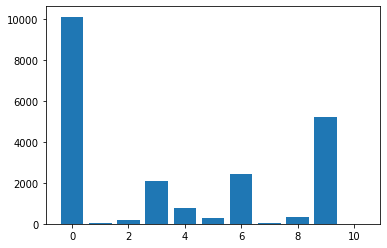

In [77]:
#Cargamos el dataset
file = "pls.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)

In [78]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.071418
Característica 1: 0.017882
Característica 2: 0.064304
Característica 3: 0.064508
Característica 4: 0.110509
Característica 5: 0.066845
Característica 6: 0.117516
Característica 7: 0.005216
Característica 8: 0.023142
Característica 9: 0.043832
Característica 10: 0.005891
Accuracy/exactitud: 75.79 %


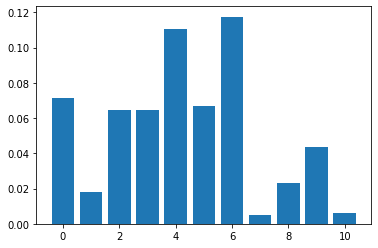

In [79]:
#Cargamos el dataset
file = "pls.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')